<a href="https://colab.research.google.com/github/bharathrajssp-jpg/sales_analysics/blob/main/analysics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

SALES DATA ANALYSIS - TASK 5

1. LOADING DATA
------------------------------------------------------------
Dataset Shape: (15, 6)
Rows: 15, Columns: 6

2. FIRST 5 ROWS OF DATA
------------------------------------------------------------
         Date Product     Category  Sales  Quantity Region
0  2024-01-01  Laptop  Electronics   1200         2  North
1  2024-01-02   Phone  Electronics    800         3  South
2  2024-01-03  Tablet  Electronics    450         1   East
3  2024-01-04  Laptop  Electronics   1150         2   West
4  2024-01-05   Phone  Electronics    850         4  North

3. BASIC STATISTICS
------------------------------------------------------------
             Sales  Quantity
count    15.000000  15.00000
mean    752.000000   3.00000
std     423.121057   1.46385
min     120.000000   1.00000
25%     465.000000   2.00000
50%     820.000000   2.00000
75%    1165.000000   4.00000
max    1300.000000   6.00000

4. MISSING VALUES CHECK
-----------------------------------------

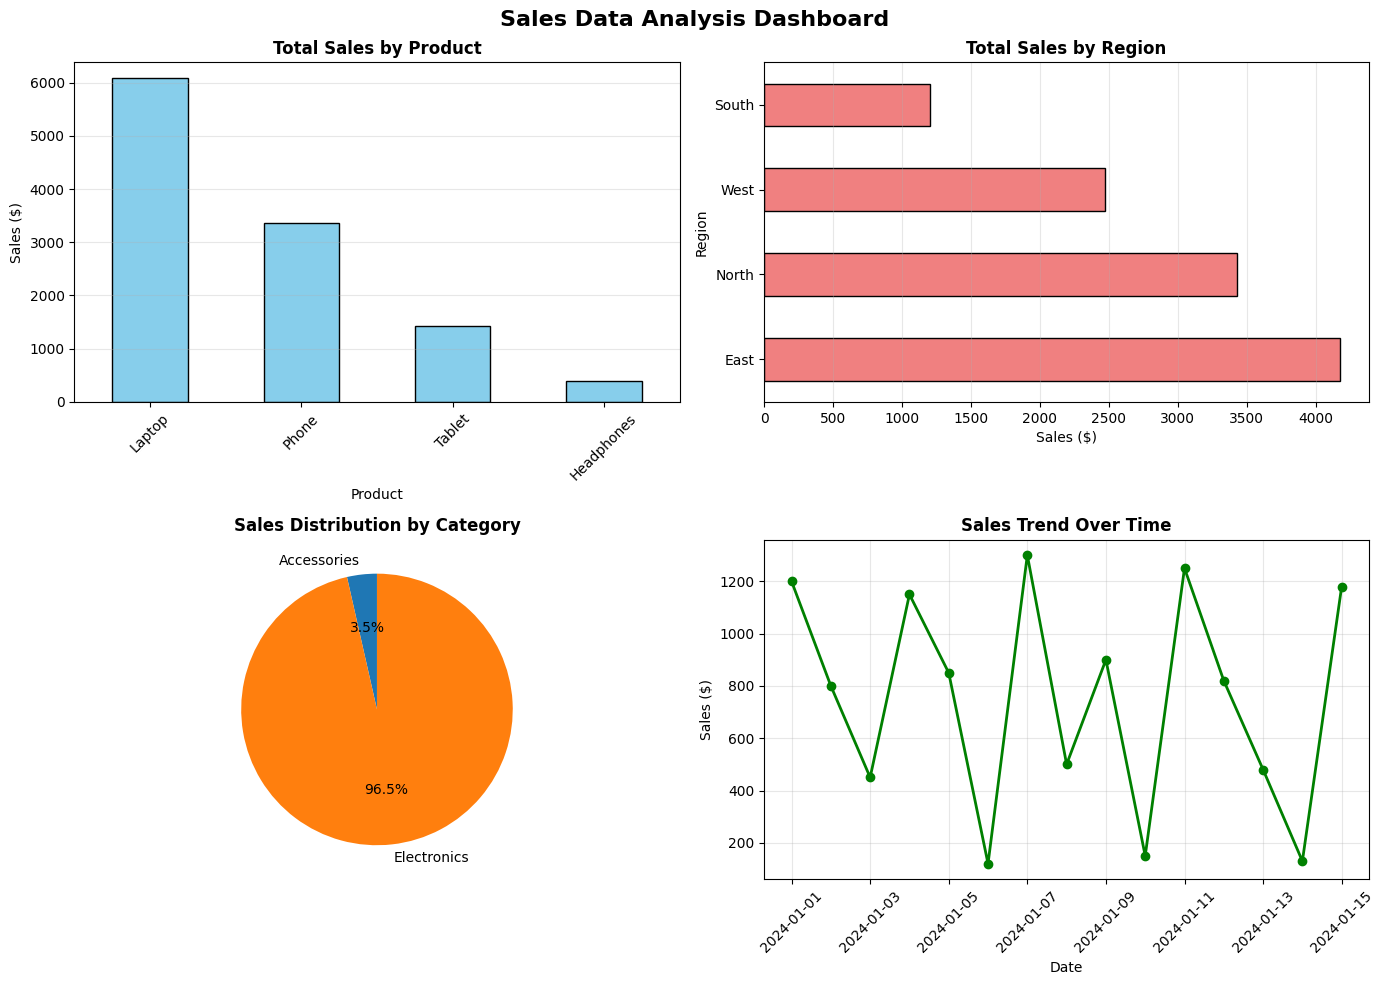


11. ADDITIONAL INSIGHTS
------------------------------------------------------------
Total Revenue: $11280
Average Sale: $752.00
Highest Sale: $1300
Lowest Sale: $120

Best Selling Product: Laptop ($6080)
Best Performing Region: East ($4180)

ANALYSIS COMPLETE!


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Create sample sales data (you can replace this with your own CSV file)
data = {
    'Date': ['2024-01-01', '2024-01-02', '2024-01-03', '2024-01-04', '2024-01-05',
             '2024-01-06', '2024-01-07', '2024-01-08', '2024-01-09', '2024-01-10',
             '2024-01-11', '2024-01-12', '2024-01-13', '2024-01-14', '2024-01-15'],
    'Product': ['Laptop', 'Phone', 'Tablet', 'Laptop', 'Phone',
                'Headphones', 'Laptop', 'Tablet', 'Phone', 'Headphones',
                'Laptop', 'Phone', 'Tablet', 'Headphones', 'Laptop'],
    'Category': ['Electronics', 'Electronics', 'Electronics', 'Electronics', 'Electronics',
                 'Accessories', 'Electronics', 'Electronics', 'Electronics', 'Accessories',
                 'Electronics', 'Electronics', 'Electronics', 'Accessories', 'Electronics'],
    'Sales': [1200, 800, 450, 1150, 850, 120, 1300, 500, 900, 150, 1250, 820, 480, 130, 1180],
    'Quantity': [2, 3, 1, 2, 4, 5, 2, 2, 3, 6, 2, 4, 2, 5, 2],
    'Region': ['North', 'South', 'East', 'West', 'North',
               'South', 'East', 'West', 'North', 'South',
               'East', 'West', 'North', 'South', 'East']
}

# Create DataFrame
df = pd.DataFrame(data)

# Save to CSV (optional - creates a sample CSV file)
df.to_csv('sales_data.csv', index=False)

print("=" * 60)
print("SALES DATA ANALYSIS - TASK 5")
print("=" * 60)

# 1. Load and display basic info
print("\n1. LOADING DATA")
print("-" * 60)
# If you have your own CSV, use: df = pd.read_csv('your_file.csv')
df = pd.read_csv('sales_data.csv')
print(f"Dataset Shape: {df.shape}")
print(f"Rows: {df.shape[0]}, Columns: {df.shape[1]}")

# 2. Display first few rows
print("\n2. FIRST 5 ROWS OF DATA")
print("-" * 60)
print(df.head())

# 3. Basic statistics
print("\n3. BASIC STATISTICS")
print("-" * 60)
print(df.describe())

# 4. Check for missing values
print("\n4. MISSING VALUES CHECK")
print("-" * 60)
print(df.isnull().sum())
print(f"\nTotal NaN values: {df.isnull().sum().sum()}")

# 5. Group by Product and sum sales
print("\n5. SALES BY PRODUCT (using groupby)")
print("-" * 60)
product_sales = df.groupby('Product')['Sales'].sum().sort_values(ascending=False)
print(product_sales)

# 6. Group by Region
print("\n6. SALES BY REGION")
print("-" * 60)
region_sales = df.groupby('Region')['Sales'].sum().sort_values(ascending=False)
print(region_sales)

# 7. Group by Category
print("\n7. SALES BY CATEGORY")
print("-" * 60)
category_sales = df.groupby('Category')['Sales'].sum()
print(category_sales)

# 8. Filter rows - Sales greater than 1000
print("\n8. FILTERING: Sales > 1000")
print("-" * 60)
high_sales = df[df['Sales'] > 1000]
print(high_sales)

# 9. Using loc[] and iloc[]
print("\n9. USING LOC[] AND ILOC[]")
print("-" * 60)
print("Using loc[0:2]: (label-based)")
print(df.loc[0:2, ['Product', 'Sales']])
print("\nUsing iloc[0:3]: (position-based)")
print(df.iloc[0:3, [1, 3]])

# 10. Create visualizations
print("\n10. CREATING VISUALIZATIONS")
print("-" * 60)
print("Generating charts...")

# Create figure with subplots
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('Sales Data Analysis Dashboard', fontsize=16, fontweight='bold')

# Chart 1: Sales by Product (Bar Chart)
product_sales.plot(kind='bar', ax=axes[0, 0], color='skyblue', edgecolor='black')
axes[0, 0].set_title('Total Sales by Product', fontweight='bold')
axes[0, 0].set_xlabel('Product')
axes[0, 0].set_ylabel('Sales ($)')
axes[0, 0].tick_params(axis='x', rotation=45)
axes[0, 0].grid(axis='y', alpha=0.3)

# Chart 2: Sales by Region (Horizontal Bar Chart)
region_sales.plot(kind='barh', ax=axes[0, 1], color='lightcoral', edgecolor='black')
axes[0, 1].set_title('Total Sales by Region', fontweight='bold')
axes[0, 1].set_xlabel('Sales ($)')
axes[0, 1].set_ylabel('Region')
axes[0, 1].grid(axis='x', alpha=0.3)

# Chart 3: Sales by Category (Pie Chart)
category_sales.plot(kind='pie', ax=axes[1, 0], autopct='%1.1f%%', startangle=90)
axes[1, 0].set_title('Sales Distribution by Category', fontweight='bold')
axes[1, 0].set_ylabel('')

# Chart 4: Sales Trend (Line Chart)
df['Date'] = pd.to_datetime(df['Date'])
df_sorted = df.sort_values('Date')
axes[1, 1].plot(df_sorted['Date'], df_sorted['Sales'], marker='o', linewidth=2, markersize=6, color='green')
axes[1, 1].set_title('Sales Trend Over Time', fontweight='bold')
axes[1, 1].set_xlabel('Date')
axes[1, 1].set_ylabel('Sales ($)')
axes[1, 1].tick_params(axis='x', rotation=45)
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('sales_analysis_charts.png', dpi=300, bbox_inches='tight')
print("✓ Charts saved as 'sales_analysis_charts.png'")
plt.show()

# Additional Analysis
print("\n11. ADDITIONAL INSIGHTS")
print("-" * 60)
print(f"Total Revenue: ${df['Sales'].sum()}")
print(f"Average Sale: ${df['Sales'].mean():.2f}")
print(f"Highest Sale: ${df['Sales'].max()}")
print(f"Lowest Sale: ${df['Sales'].min()}")
print(f"\nBest Selling Product: {product_sales.idxmax()} (${product_sales.max()})")
print(f"Best Performing Region: {region_sales.idxmax()} (${region_sales.max()})")

print("\n" + "=" * 60)
print("ANALYSIS COMPLETE!")
print("=" * 60)